In [12]:
library(ggplot2)
library(dplyr)
library(gplots)
library(pvclust)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)
library(sigmoid)
library(heatmap.plus)

In [13]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
variant_list <- read.table("../variant_annotation/780_variant_annotation_COUPTF2_TBR1_DLX1_CBH.csv",header=T,sep=",",row.names=1)
filtered$Punch<-as.character(filtered$Punch)
filtered$Note<-as.character(filtered$Note)
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,] #Use 269 variants. assign this to mosaic_filtered
shared_variant_list<-variant_list[variant_list$sample_number_presented>1,]
shared_mosaic_filtered<-mosaic_filtered[mosaic_filtered$CHROM.POS.REF.ALT %in% rownames(shared_variant_list),]

# Fig3 Var x Sample heatmap 

In [14]:
melt_mtcars<-shared_mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Organ",'Region','Punch','Sort_main','Hemisphere')]
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('TBR1','DLX1','COUPTF2'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Sort_main %in% c('1'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX'),]
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [15]:
melt_mtcars<-na.omit(melt_mtcars)

In [16]:
length(unique(melt_mtcars$CHROM.POS.REF.ALT))

[1] 186

In [17]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Hemisphere+Region+Organ+Cell_Type~CHROM.POS.REF.ALT, value.var = "MAF", rm.na=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$ID
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[,-1]
nrow(casted_MAF_VarBySample2)
unique(casted_MAF_VarBySample2$Hemisphere)
unique(casted_MAF_VarBySample2$Organ)
unique(casted_MAF_VarBySample2$Region)
unique(casted_MAF_VarBySample2$Cell_Type)

[1] 45

[1] "L" "R"

[1] "CTX"

[1] "CC" "EC" "F"  "I"  "mO" "O"  "P"  "T"

[1] "COUPTF2" "DLX1"    "TBR1"

In [18]:
rownames(casted_MAF_VarBySample2)

[1] "7669_L_CC_2_COUPTF2"  "7669_L_CC_2_DLX1"     "7669_L_EC_COUPTF2"   
 [4] "7669_L_EC_DLX1"       "7669_L_F_1_COUPTF2"   "7669_L_F_1_DLX1"     
 [7] "7669_L_F_1_TBR1"      "7669_L_I_1_COUPTF2"   "7669_L_I_1_DLX1"     
[10] "7669_L_I_1_TBR1"      "7669_L_mO_COUPTF2"    "7669_L_mO_DLX1"      
[13] "7669_L_O_1_COUPTF2"   "7669_L_O_1_DLX1"      "7669_L_O_1_TBR1"     
[16] "7669_L_P_1_COUPTF2"   "7669_L_P_1_DLX1"      "7669_L_P_1_TBR1"     
[19] "7669_L_T_1_COUPTF2"   "7669_L_T_1_DLX1"      "7669_L_T_1_TBR1"     
[22] "7669_R_CC_Mid_TBR1"   "7669_R_CCMid_COUPTF2" "7669_R_CCMid_DLX1"   
[25] "7669_R_EC_COUPTF2"    "7669_R_EC_DLX1"       "7669_R_EC_TBR1"      
[28] "7669_R_F_1_COUPTF2"   "7669_R_F_1_DLX1"      "7669_R_F_1_TBR1"     
[31] "7669_R_I_1_COUPTF2"   "7669_R_I_1_DLX1"      "7669_R_I_1_TBR1"     
[34] "7669_R_mO_COUPTF2"    "7669_R_mO_DLX1"       "7669_R_mO_TBR1"      
[37] "7669_R_O_1_COUPTF2"   "7669_R_O_1_DLX1"      "7669_R_O_1_TBR1"     
[40] "7669_R_P_1_COUPTF2"   "7669_R_P_1_DLX1"      "7669_R_P_1_TBR1"     
[43] "7669_R_T_1_COUPTF2"   "7669_R_T_1_DLX1"      "7669_R_T_1_TBR1"

In [19]:
Normalized_casted_MAF_VarBySample2<-t(na.omit(t(casted_MAF_VarBySample2[,-1:-4])))

In [20]:
set.seed(123)
res.pv <- pvclust(t(Normalized_casted_MAF_VarBySample2), method.dist="manhattan", method.hclust="complete", nboot = 10000,  parallel=TRUE)

In [ ]:
options(repr.plot.width=18, repr.plot.height=9)
plot(res.pv, hang = -1)
pvrect(res.pv)

In [25]:
pdf(file="7669_varXsample_CTX_sorted_heatmap_bootstrap.pdf",height=9,width=18)
plot(res.pv, hang = -1)
pvrect(res.pv)
dev.off() 

png 
  2

In [21]:
myCol<-as.data.frame(t(na.omit(t(casted_MAF_VarBySample2[,1:4]))))
myCol$Hemisphere_col[myCol$Hemisphere %in% c("R")]<-"Red"
myCol$Hemisphere_col[myCol$Hemisphere %in% c("L")]<-"Blue"
myCol$Region_col[myCol$Region %in% c("EC")]<-"#F0A0FF"
myCol$Region_col[myCol$Region %in% c("F")]<-"#0075DC"
myCol$Region_col[myCol$Region %in% c("I")]<-"#993F00"
myCol$Region_col[myCol$Region %in% c("mO")]<-"#4C005C"
myCol$Region_col[myCol$Region %in% c("O")]<-"#FF5005"
myCol$Region_col[myCol$Region %in% c("P")]<-"#FFE100"
myCol$Region_col[myCol$Region %in% c("T")]<-"#2BCE48"
myCol$Region_col[myCol$Region %in% c("CC")]<-"#808080"

myCol$Cell_Type[myCol$Cell_Type %in% c("DLX1")]<-"#F06666"
myCol$Cell_Type[myCol$Cell_Type %in% c("COUPTF2")]<-"#5FBEEB"
myCol$Cell_Type[myCol$Cell_Type %in% c("TBR1")]<-"#7BBE42"
myCol2<-as.matrix(cbind(myCol$Hemisphere_col,myCol$Cell_Type,myCol$Region_col))
colnames(myCol2)<-c("Hemisphere","Cell_Type","Region")

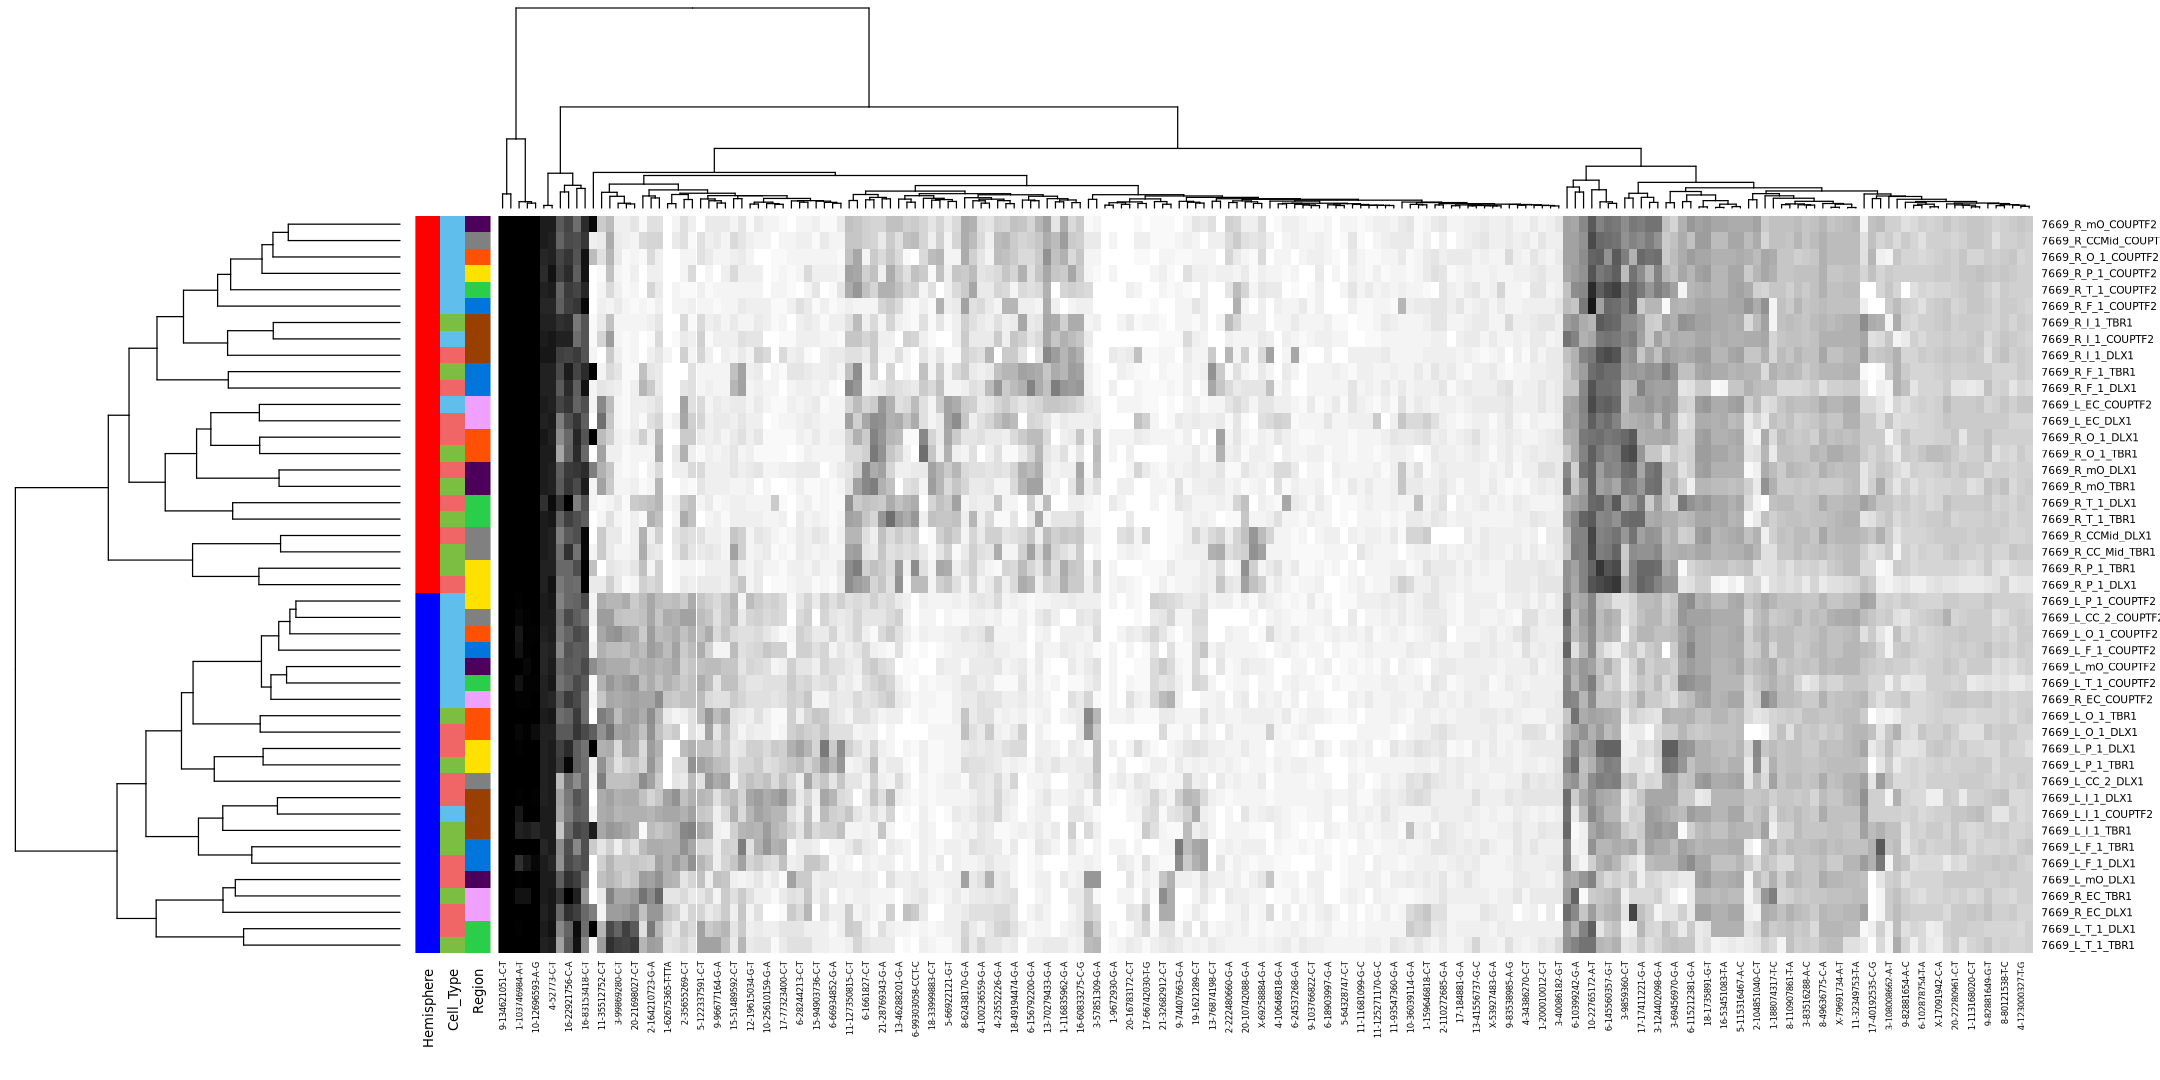

In [22]:
options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","black","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))

In [25]:
pdf(file="7669_varXsample_CTX_sorted_heatmap_scalebar.pdf",height=27,width=54)
options(repr.plot.width=18, repr.plot.height=9)
Colors = c("white","black","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))

dev.off()               

png 
  2

In [27]:
pdf(file="7669_varXsample_CTX_sorted_heatmap_scalebar.pdf",height=27,width=54)
options(repr.plot.width=18, repr.plot.height=9)
Colors = c("white","Black","Black")
Colors = colorRampPalette(Colors)(100)
heatmap.2(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             #RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off() 

png 
  2